In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
shampoo = pd.read_csv("shampoo_sales.csv", index_col = 'Month', parse_dates = ['Month'])
shampoo.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [3]:
type(shampoo)

pandas.core.frame.DataFrame

In [9]:
shampoo.dtypes

Sales    float64
dtype: object

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,6)

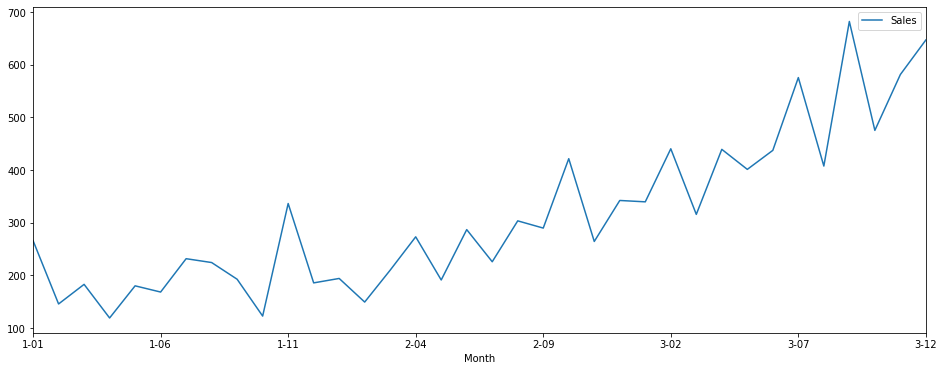

In [21]:
# WHOLE DATASET
shampoo.plot()
plt.show()

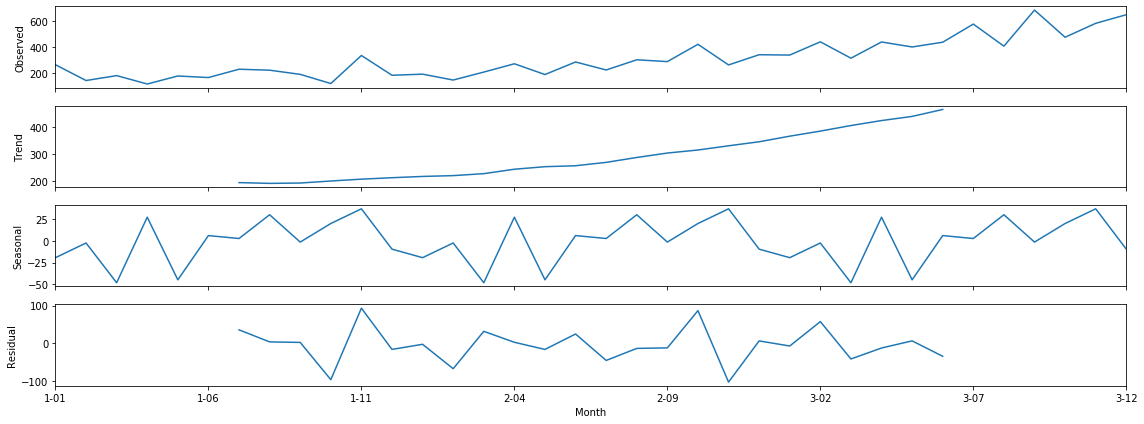

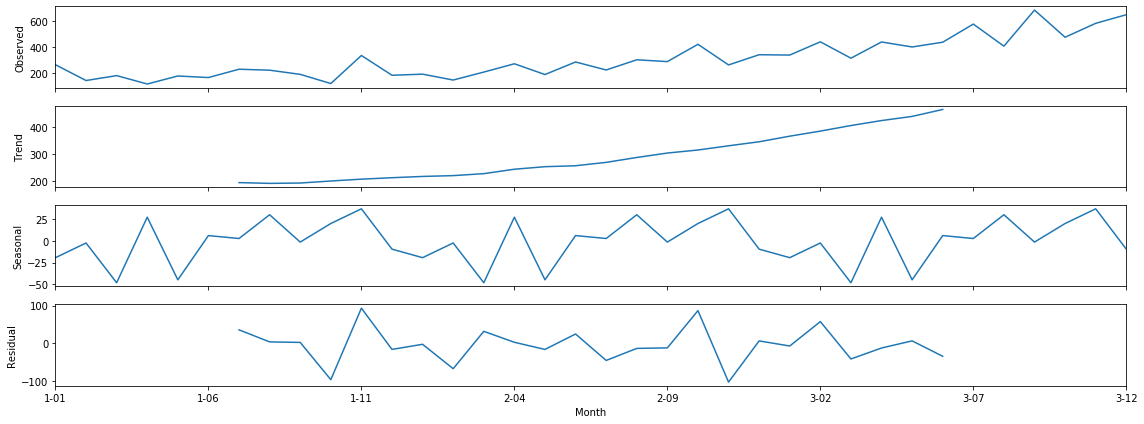

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(shampoo['Sales'], model = 'additive', freq = 12)
decomposition.plot()

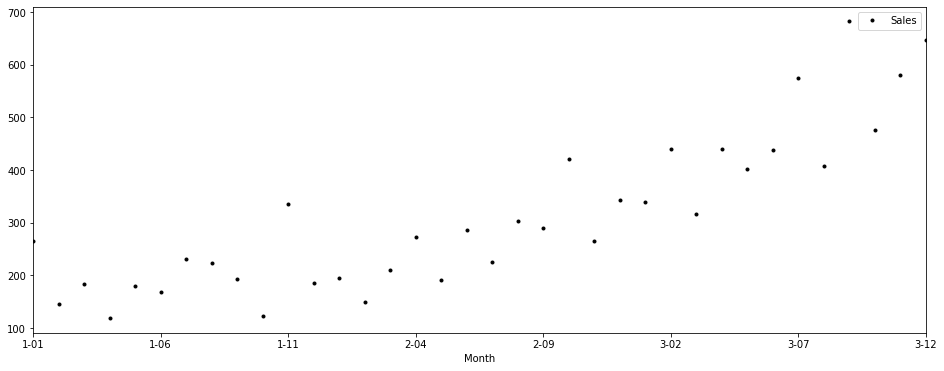

In [23]:
shampoo.plot(style = 'k.')

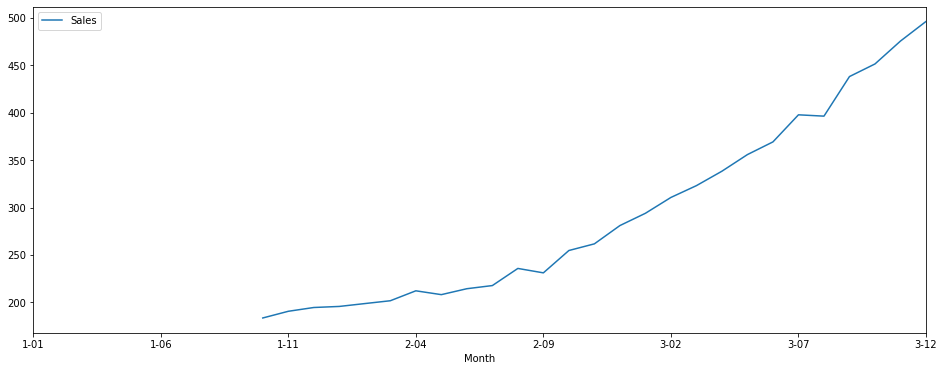

In [24]:
shampoo_ma = shampoo.rolling(window = 10).mean()
shampoo_ma.plot()

In [25]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis = 1)
shampoo_base.head()

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [26]:
shampoo_base.columns= ['ActualSales', 'ForecastSales']

In [27]:
shampoo_base.head()

,ActualSales,ForecastSales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [28]:
shampoo_base.dropna(inplace = True)

In [29]:
shampoo_base.head()

,ActualSales,ForecastSales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [34]:
shampoo_error_MSE = mean_squared_error(shampoo_base.ActualSales, shampoo_base.ForecastSales)
shampoo_error_MSE

11715.388285714285

In [36]:
shampoo_error_MAE = mean_absolute_error(shampoo_base.ActualSales, shampoo_base.ForecastSales)
shampoo_error_MAE

88.22

In [37]:
np.sqrt(shampoo_error_MSE)

108.23764726616282

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

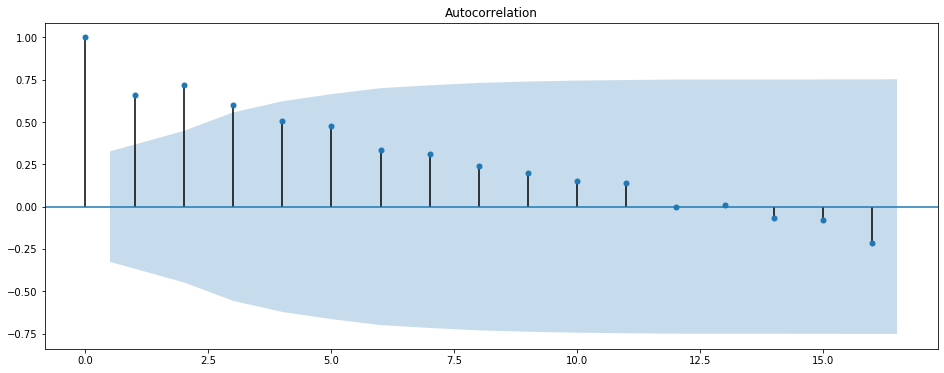

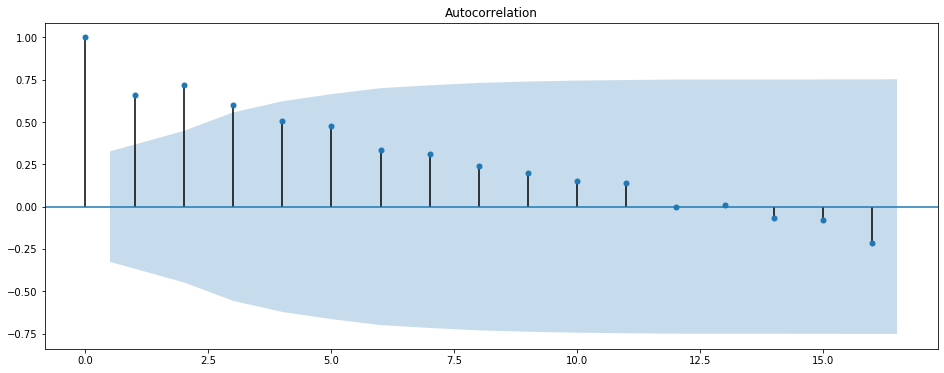

In [40]:
plot_acf(shampoo)

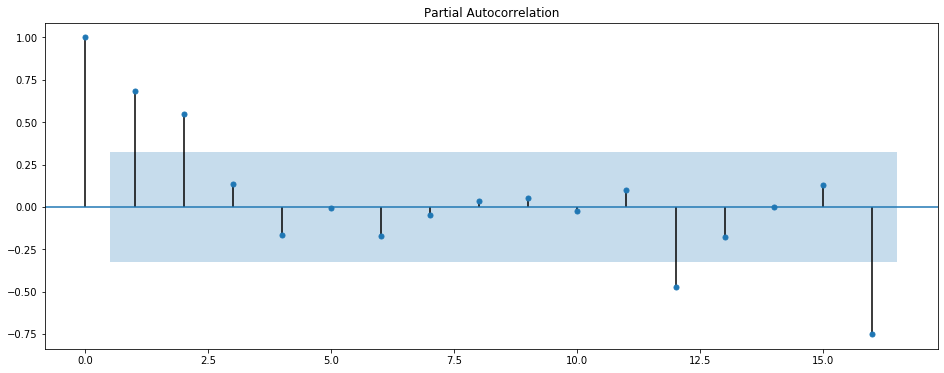

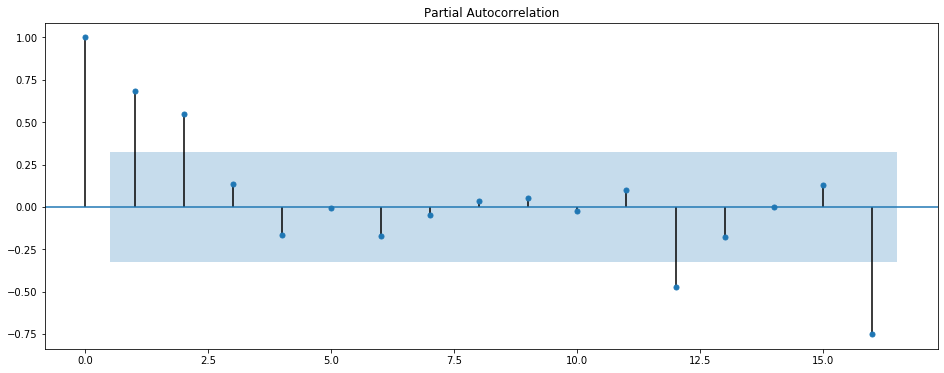

In [41]:
plot_pacf(shampoo)

In [42]:
 from statsmodels.tsa.arima_model import ARIMA

In [43]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [46]:
shampoo_ARIMA = ARIMA(shampoo_train, order = (3, 1, 2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [47]:
shampoo_ARIMA_fit = shampoo_ARIMA.fit()

In [48]:
shampoo_ARIMA_fit.aic

272.38919480715583

In [49]:
shampoo_ARIMA_pred = shampoo_ARIMA_fit.forecast(steps = 11)[0]

In [50]:
np.sqrt(mean_squared_error(shampoo_test, shampoo_ARIMA_pred))

130.9270508367536

In [53]:
import warnings
warnings.filterwarnings('ignore')

p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            train, test = shampoo[0:25], shampoo[25:36]
            predictions  = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('ARIMA%s RMSE = %.2f'% (order, error))
                    print(min(error))
                except:
                    continue

ARIMA(0, 0, 0) RMSE = 77950.15
ARIMA(0, 0, 1) RMSE = 70119.33
ARIMA(0, 0, 2) RMSE = 58566.34
ARIMA(0, 0, 3) RMSE = 62031.18
ARIMA(0, 0, 4) RMSE = 30922.39
ARIMA(0, 1, 0) RMSE = 33849.87
ARIMA(0, 1, 1) RMSE = 40654.43
ARIMA(0, 1, 2) RMSE = 34511.79
ARIMA(0, 2, 0) RMSE = 34017.03
ARIMA(0, 2, 1) RMSE = 28393.09
ARIMA(1, 0, 0) RMSE = 61159.04
ARIMA(1, 0, 1) RMSE = 46528.83
ARIMA(1, 0, 2) RMSE = 43922.02
ARIMA(1, 0, 4) RMSE = 25186.03
ARIMA(1, 1, 0) RMSE = 31687.09
ARIMA(1, 1, 1) RMSE = 42176.70
ARIMA(1, 2, 0) RMSE = 18845.80
ARIMA(1, 2, 1) RMSE = 26129.53
ARIMA(2, 0, 0) RMSE = 45248.37
ARIMA(2, 0, 1) RMSE = 31948.08
ARIMA(2, 0, 4) RMSE = 12020.16
ARIMA(2, 1, 0) RMSE = 35488.39
ARIMA(2, 1, 1) RMSE = 39633.97
ARIMA(2, 1, 2) RMSE = 35884.79
ARIMA(2, 2, 0) RMSE = 34024.31
ARIMA(3, 0, 0) RMSE = 46326.66
ARIMA(3, 1, 0) RMSE = 22024.85
ARIMA(3, 1, 1) RMSE = 22841.66
ARIMA(3, 1, 2) RMSE = 18095.36
ARIMA(3, 1, 4) RMSE = 37611.03
ARIMA(3, 2, 0) RMSE = 24695.23
ARIMA(3, 2, 1) RMSE = 16368.69
ARIMA(3,